## US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años). 

In [61]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('./uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [62]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


# Documentacion

In [1]:
import statsmodels.api as sm


In [4]:
sm.webdoc('AutoReg')

In [5]:
sm.webdoc(sm.OLS, stable=False)

## Gráfico de la serie

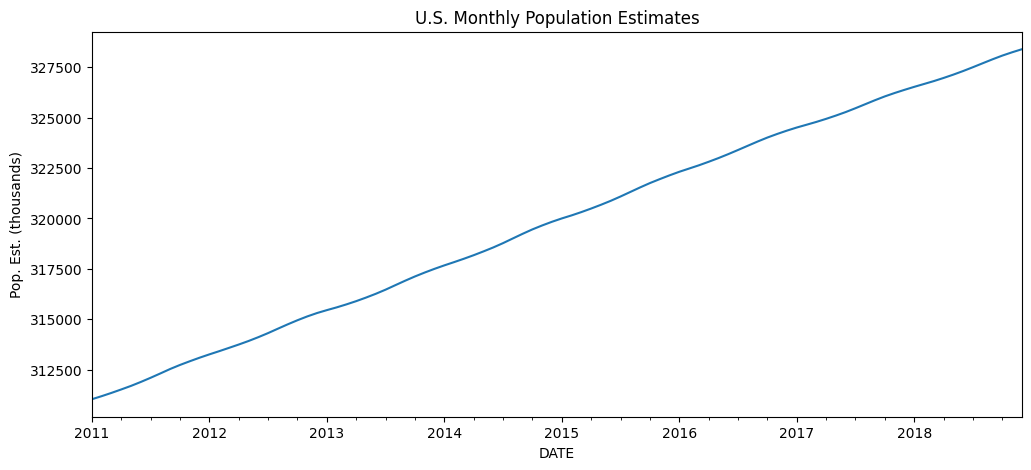

In [63]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

## Datos entrenamiento/prueba


In [64]:
len(df)

96

In [65]:
train = df.iloc[:84]
test = df.iloc[84:]

## Modelo AR(1) 

In [66]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
from statsmodels.tsa.api import AutoReg
import pandas as pd

# Asegúrate de que 'DATE' esté en formato datetime
train.index = pd.to_datetime(train.index)

# Ajustar el modelo AutoReg
modelo = AutoReg(train['PopEst'], lags=1)  # Puedes ajustar el orden de rezago según sea necesario
AR1fit = modelo.fit()

# Obtener el número de rezagos utilizados en el modelo AR
num_rezagos = AR1fit.params.shape[0] - 1  # Restamos 1 para excluir el término constante
print(f'Lag: {num_rezagos}')

# Imprimir los coeficientes del modelo
print(f'Coefficients:\n{AR1fit.params}')


Lag: 1
Coefficients:
const        284.913797
PopEst.L1      0.999686
dtype: float64


In [68]:
# model = AR(train['PopEst'])
# AR1fit = model.fit(maxlag=1,method='mle')
# print(f'Lag: {AR1fit.k_ar}')
# print(f'Coefficients:\n{AR1fit.params}')

In [69]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [70]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [71]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


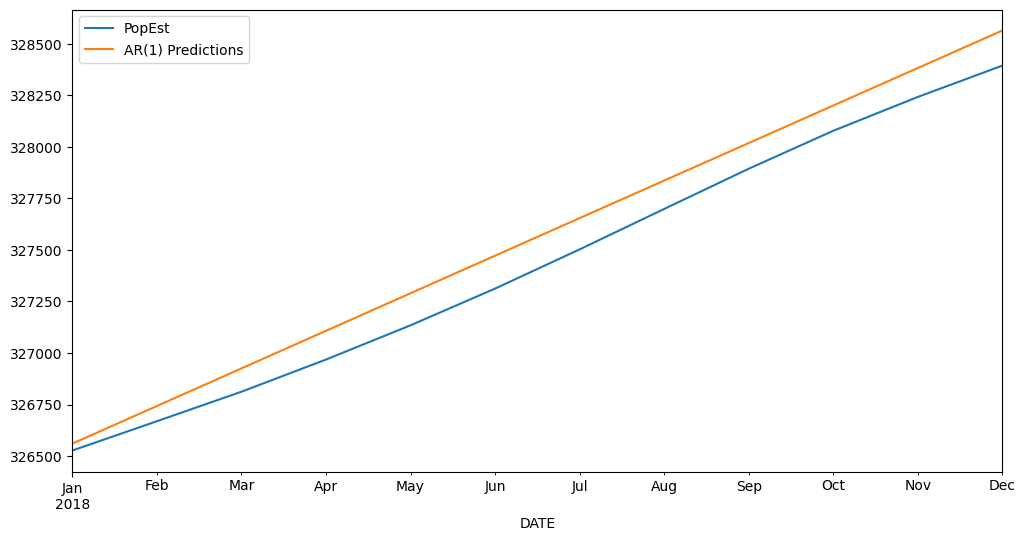

In [72]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Modelo AR(2)

In [73]:
# Ajustar el modelo AutoReg
modelo = AutoReg(train['PopEst'], lags=2)  # Puedes ajustar el orden de rezago según sea necesario
AR2fit = modelo.fit()

# Obtener el número de rezagos utilizados en el modelo AR
num_rezagos = AR2fit.params.shape[0] - 1  # Restamos 1 para excluir el término constante
print(f'Lag: {num_rezagos}')

# Imprimir los coeficientes del modelo
print(f'Coefficients:\n{AR2fit.params}')


Lag: 2
Coefficients:
const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64


In [74]:
# # Recall that our model was already created above based on the training set
# AR2fit = model.fit(maxlag=2,method='mle')
# print(f'Lag: {AR2fit.k_ar}')
# print(f'Coefficients:\n{AR2fit.params}')

In [75]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

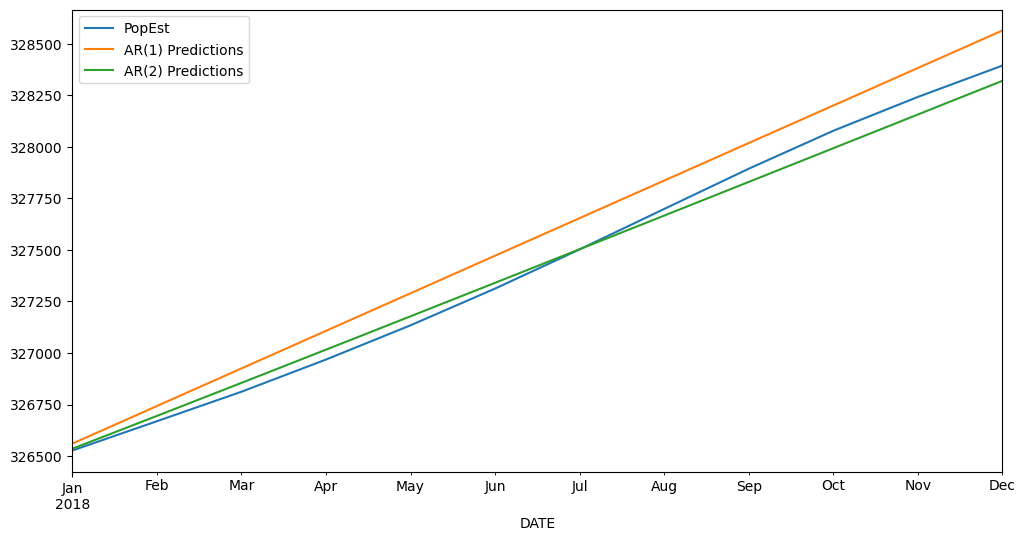

In [76]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Modelo AR(p) donde statsmodels elige p


In [96]:
# Importar librerías necesarias
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ARResults


# Ajustar diferentes modelos AR de diferentes órdenes
AR1_model = AutoReg(train, lags=1).fit()
AR2_model = AutoReg(train, lags=10).fit()
AR8_model = AutoReg(train, lags=8).fit()

# Imprimir los coeficientes de cada modelo
print("Modelo AR(1):")
print(AR1_model.params)
print("Modelo AR(2):")
print(AR2_model.params)
print("Modelo AR(8):")
print(AR8_model.params)

# Calcular AIC para cada modelo
print(f"AR(1) AIC: {AR1_model.aic}")
print(f"AR(2) AIC: {AR2_model.aic}")
print(f"AR(8) AIC: {AR8_model.aic}")

# Calcular BIC para cada modelo
print(f"AR(1) BIC: {AR1_model.bic}")
print(f"AR(2) BIC: {AR2_model.bic}")
print(f"AR(8) BIC: {AR8_model.bic}")


Modelo AR(1):
const        284.913797
PopEst.L1      0.999686
dtype: float64
Modelo AR(2):
const         92.313872
PopEst.L1      2.309054
PopEst.L2     -2.053715
PopEst.L3      1.381127
PopEst.L4     -1.183727
PopEst.L5      0.821019
PopEst.L6     -0.696891
PopEst.L7      0.723430
PopEst.L8     -0.363562
PopEst.L9      0.261208
PopEst.L10    -0.198199
dtype: float64
Modelo AR(8):
const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64
AR(1) AIC: 767.6378091856507
AR(2) AIC: 470.26240047974414
AR(8) AIC: 488.3530527017233
AR(1) BIC: 774.8943310090405
AR(2) BIC: 497.91118159819416
AR(8) BIC: 511.6603861045866


In [85]:
# Obtener el número de rezagos utilizados en el modelo AR
num_rezagos = ARfit.params.shape[0] - 1  # Restamos 1 para excluir el término constante
print(f'Lag: {num_rezagos}')

# Imprimir los coeficientes del modelo
print(f'Coefficients:\n{ARfit.params}')


Lag: 10
Coefficients:
const         92.313872
PopEst.L1      2.309054
PopEst.L2     -2.053715
PopEst.L3      1.381127
PopEst.L4     -1.183727
PopEst.L5      0.821019
PopEst.L6     -0.696891
PopEst.L7      0.723430
PopEst.L8     -0.363562
PopEst.L9      0.261208
PopEst.L10    -0.198199
dtype: float64


In [19]:
# ARfit = model.fit(ic='bic')
# print(f'Lag: {ARfit.k_ar}')
# print(f'Coefficients:\n{ARfit.params}')

In [97]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

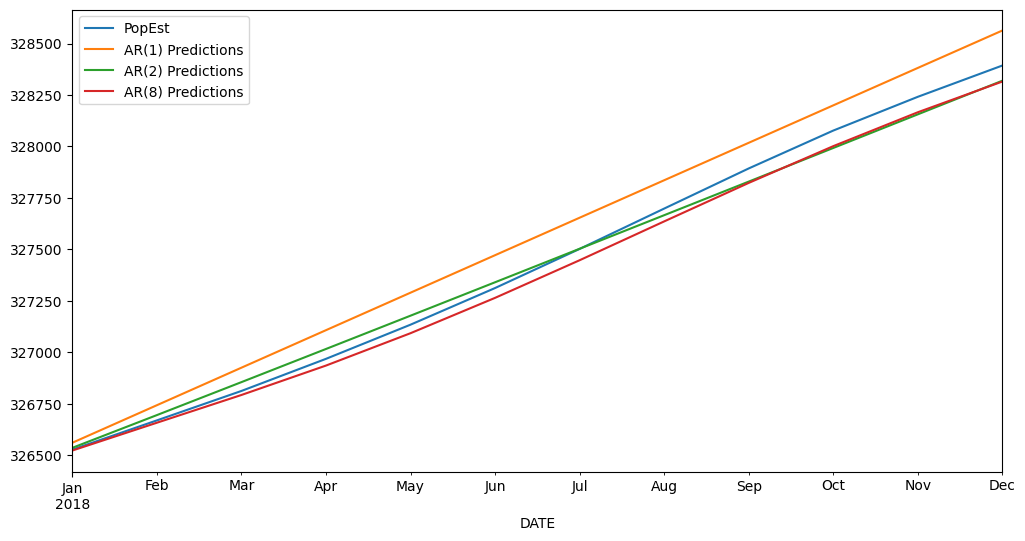

In [98]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [99]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258563
AR(8) Error: 2904.628466


In [23]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

NameError: name 'ARfit' is not defined

## Predicciones

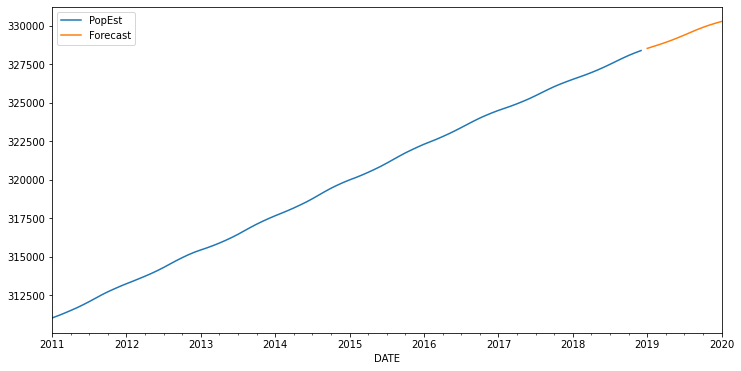

In [ ]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));